---
# Lead Dell Fortaleza - Curso de Machine Learning 📊
### Oficina 1 - Regressão Linear Múltipla

Neste notebook iremos realizar a análise do conjunto de dados de carros usados do site www.cardekho.com disponível no [Kaggle](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) e adaptado para o curso da Lead Dell. Será implementado um modelo de regressão linear múltipla utilizando a biblioteca [Scikit Learn](https://scikit-learn.org/stable/index.html#). O objetivo desse estudo é prever o preço de venda dos veículos, levando em consideração os atributos <b>"ano"</b>, <b>"preço atual"</b>,<b>kilômetros rodados"</b> e <b>"tipo de combustível"</b>.

Por: Pedro Florencio de Almeida Neto

---

### <b> Passo 1: Análise Exploratória dos Dados 🔎️ </b>
Esta etapa consiste em analisar e entender o dataset, buscando uma compreensão do problema proposto. Iremos realizar:
* Importação das bibliotecas de análise, visualização e tratamento dos dados;
* Investigação das principais informações do dataset;
* Verificação de como os dados se distribuem;
* Identificação dos dados ausentes.

#### Importando as bibliotecas necessárias

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Carregando os dados

In [267]:
df = pd.read_csv('car_data.csv')
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,Gasolina,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,Gasolina,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,Gasolina,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Revendedor,Manual,0


#### Informações sobre o dataset

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nome_carro        301 non-null    object 
 1   ano               301 non-null    int64  
 2   preco_venda       301 non-null    float64
 3   preco_atual       301 non-null    float64
 4   kms_rodados       301 non-null    int64  
 5   tipo_combustivel  301 non-null    object 
 6   tipo_vendedor     301 non-null    object 
 7   tipo_transmissao  301 non-null    object 
 8   n_donos           301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


---
<b> O dataset é composto por 301 automóveis. </b>

As informações contidas nele são:

**nome_carro:**        nome do carro - (atributo categórico)

**ano:**               ano de fabricação - (atributo categórico)

**preco_venda:**       preço que o dono quer vender - (atributo quantitativo)

**preco_atual:**       preço da concessionária - (atributo quantitativo)

**kms_rodados:**       kilometragem do carro - (atributo quantitativo)

**tipo_combustivel:**  tipo de combustível do carro (Diesel, Gasolina, GasNatural) - (atributo categórico)

**tipo_vendedor:**     se o vendedor é um revendedor ou é a própria pessoa - (atributo categórico)

**tipo_transmissao:**  tipo de câmbio do carro - (atributo categórico)

**n_donos:**           número de donos que o carro já teve - (atributo quantitativo)

---

In [269]:
df.describe()

,ano,preco_venda,preco_atual,kms_rodados,n_donos
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Verificando a presença de valores ausentes

In [270]:
df.isnull().sum()

nome_carro          0
ano                 0
preco_venda         0
preco_atual         0
kms_rodados         0
tipo_combustivel    0
tipo_vendedor       0
tipo_transmissao    0
n_donos             0
dtype: int64

Não há valores ausentes.

#### Explorando um pouco os dados, com o objetivo de responder algumas questões interessantes.

* <b> Quantos modelos de veículos estão presentes e quais os 10 que mais aparecem? <b>

In [271]:
carros = df['nome_carro'].value_counts()
len(carros)

98

Temos 98 modelos distintos no dataset.

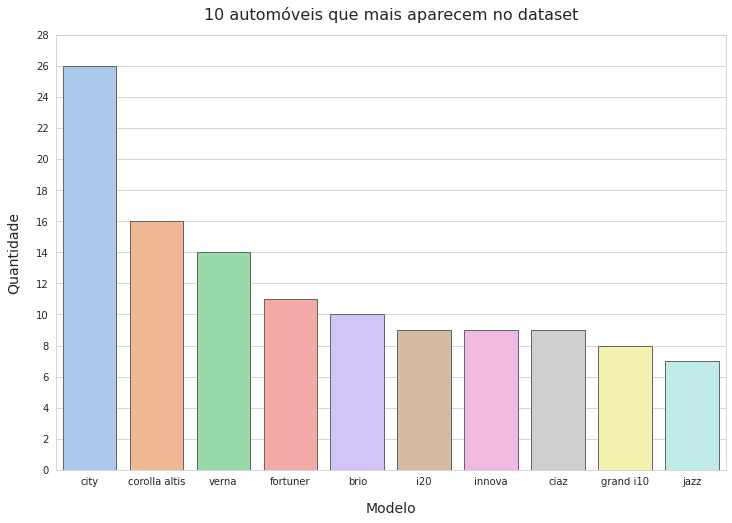

In [272]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.barplot(x=carros.head(10).index,y=carros.head(10).values,palette='pastel',edgecolor='0.4')
plt.yticks(np.arange(0,29,2))
plt.title('10 automóveis que mais aparecem no dataset',pad=15,fontdict={'fontsize':16})
plt.xlabel('Modelo',labelpad=15,fontdict={'fontsize':14})
plt.ylabel('Quantidade',labelpad=15,fontdict={'fontsize':14})
plt.show()

* <b> Como o preço de venda se distribui?</b>

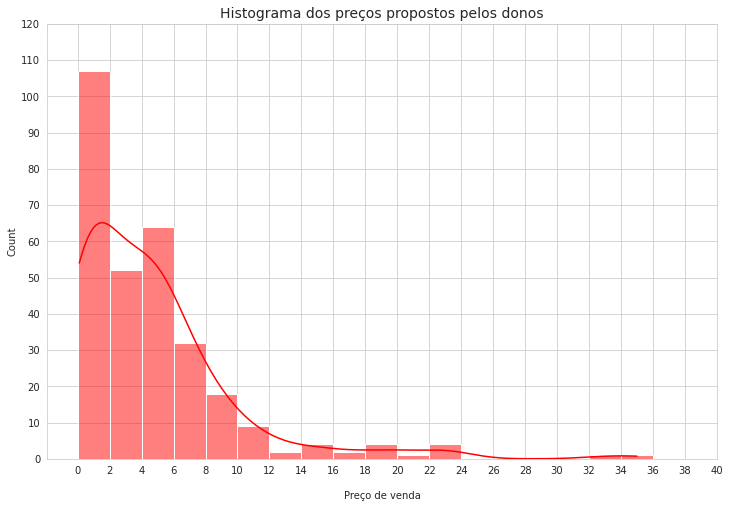

In [273]:
plt.figure(figsize=(12,8))
sns.histplot(x='preco_venda',data=df,kde=True,color='red',fill=True,binrange=(0,38),binwidth=2)
plt.xticks(np.arange(0,41,2))
plt.yticks(np.arange(0,121,10))
plt.title('Histograma dos preços propostos pelos donos',fontdict={'fontsize':14})
plt.xlabel('Preço de venda',labelpad=15)
plt.show()

A maioria dos automóveis se ditribuem em valores abaixo dos 10000 dólares, concentrando-se em valores menores que 2000 dólares.

* <b>Quais os automóveis com maiores médias de preço de venda?</b>

In [274]:
maiores_medias = df.groupby(by='nome_carro').mean()['preco_venda'].sort_values(ascending=False).head(10)
maiores_medias

nome_carro
land cruiser     35.000000
fortuner         18.685455
innova           12.777778
creta            11.800000
elantra          11.600000
vitara brezza     9.250000
ciaz              7.472222
city              7.419231
corolla altis     7.183125
ertiga            6.775000
Name: preco_venda, dtype: float64

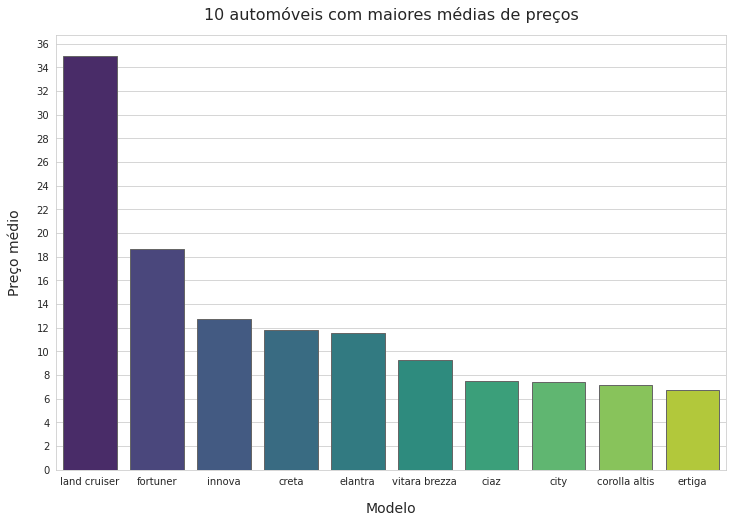

In [275]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.barplot(x=maiores_medias.index,y=maiores_medias.values,palette='viridis',edgecolor='0.4')
plt.yticks(np.arange(0,37,2))
plt.title('10 automóveis com maiores médias de preços',pad=15,fontdict={'fontsize':16})
plt.xlabel('Modelo',labelpad=15,fontdict={'fontsize':14})
plt.ylabel('Preço médio',labelpad=15,fontdict={'fontsize':14})
plt.show()

* <b> Qual a proporção de tipos de combustíveis presentes no dataset? </b>

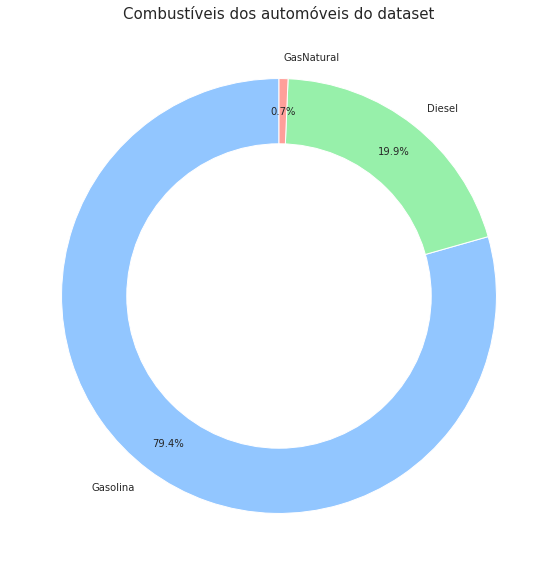

In [276]:
combustiveis = df['tipo_combustivel'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(x=combustiveis.values, labels=combustiveis.index, autopct='%1.1f%%',startangle=90, pctdistance=0.85)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Combustíveis dos automóveis do dataset',fontdict={'fontsize':15})
plt.show()

Há um predominância de carros a gasolina.

---
### <b> Passo 2: Pré-Processamento dos Dados 📝 </b>
Nesta etapa iremos realizar o tratamento dos dados, removendo ou injetando dados que são faltantes. Além disso:
* Fazer a codificação de variáveis categóricas;
* Selecionar as colunas que são importantes para o nosso modelo;
* Fazer o escalonamento dos dados;
* Verificar a presença de outliers;
* Separação do conjunto de treino e de teste.

#### Substituindo os dados categóricos por valores quantitativos, para depois transferir ao modelo de regressão. Precisaremos codificar apenas o atributo que se refere ao combustível.

In [277]:
df['tipo_combustivel'].replace({'Gasolina':0,'Diesel':1,'GasNatural':2},inplace=True) # Codificou-se 0 para Gasolina, 1 para Diesel e 2 para Gás Natural.
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,1,Revendedor,Manual,0


#### Para cada ano dos veículos, vamos observar seus respectivos preços de venda

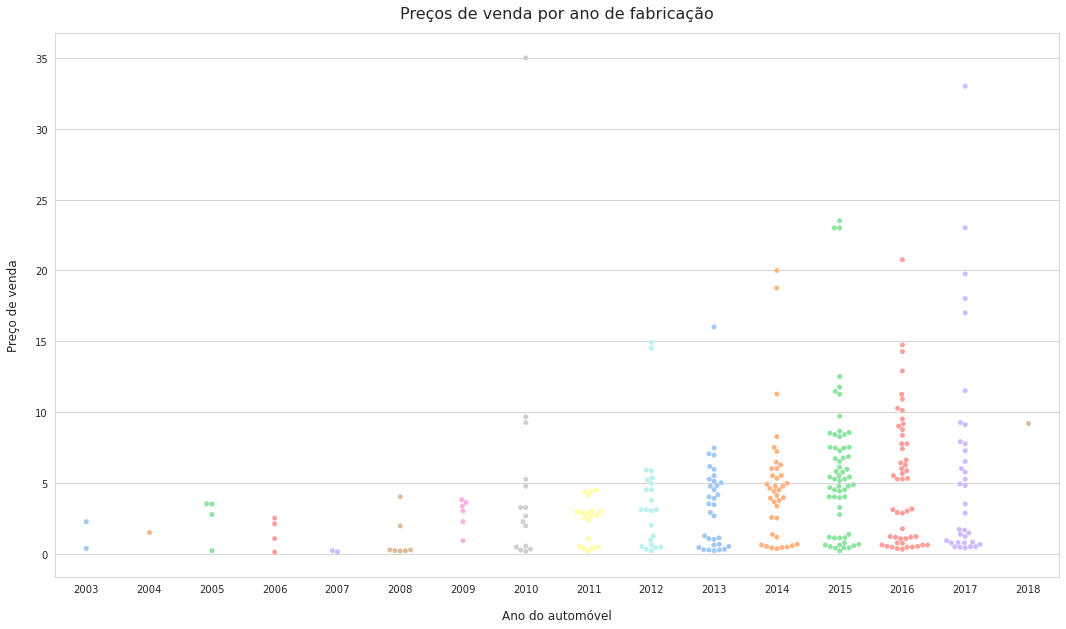

In [278]:
plt.figure(figsize=(18,10))
sns.swarmplot(x=df['ano'],y=df['preco_venda'],data=df,palette='pastel')
plt.title('Preços de venda por ano de fabricação',pad=15,fontdict={'fontsize':16})
plt.xlabel('Ano do automóvel',labelpad=15,fontdict={'fontsize':12})
plt.ylabel('Preço de venda',labelpad=15,fontdict={'fontsize':12})
plt.show()

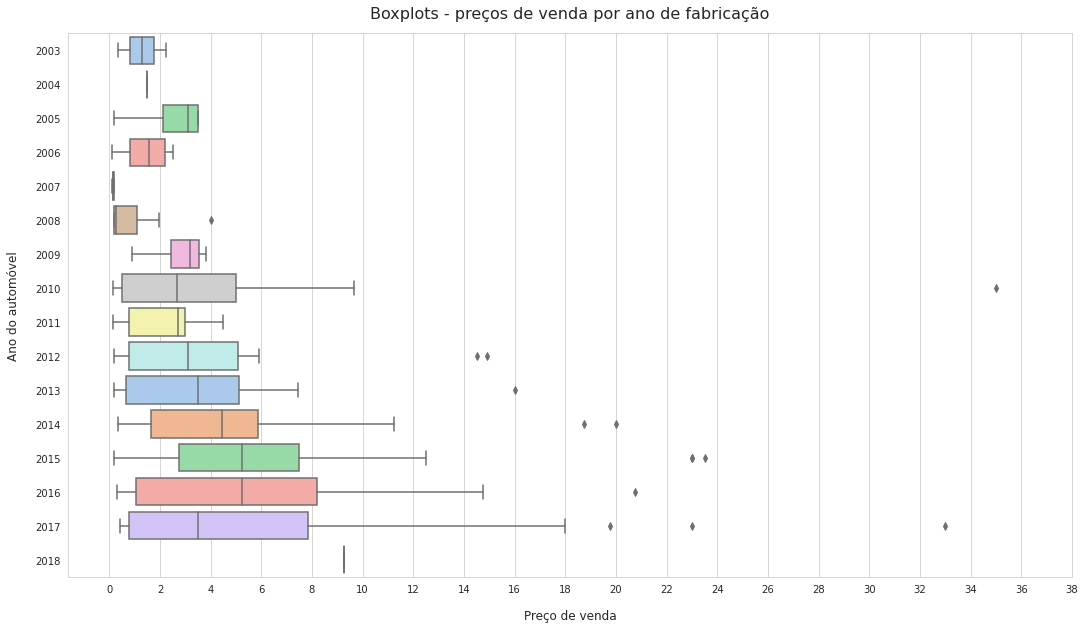

In [279]:
plt.figure(figsize=(18,10))
sns.boxplot(y=df['ano'],x=df['preco_venda'],data=df,palette='pastel',orient='h')
plt.title('Boxplots - preços de venda por ano de fabricação',pad=15,fontdict={'fontsize':16})
plt.xlabel('Preço de venda',labelpad=15,fontdict={'fontsize':12})
plt.ylabel('Ano do automóvel',labelpad=15,fontdict={'fontsize':12})
plt.xticks(np.arange(0,40,2))
plt.show()

#### Vamos verificar os anos de fabricação dos veículos e seus respectivos km rodados

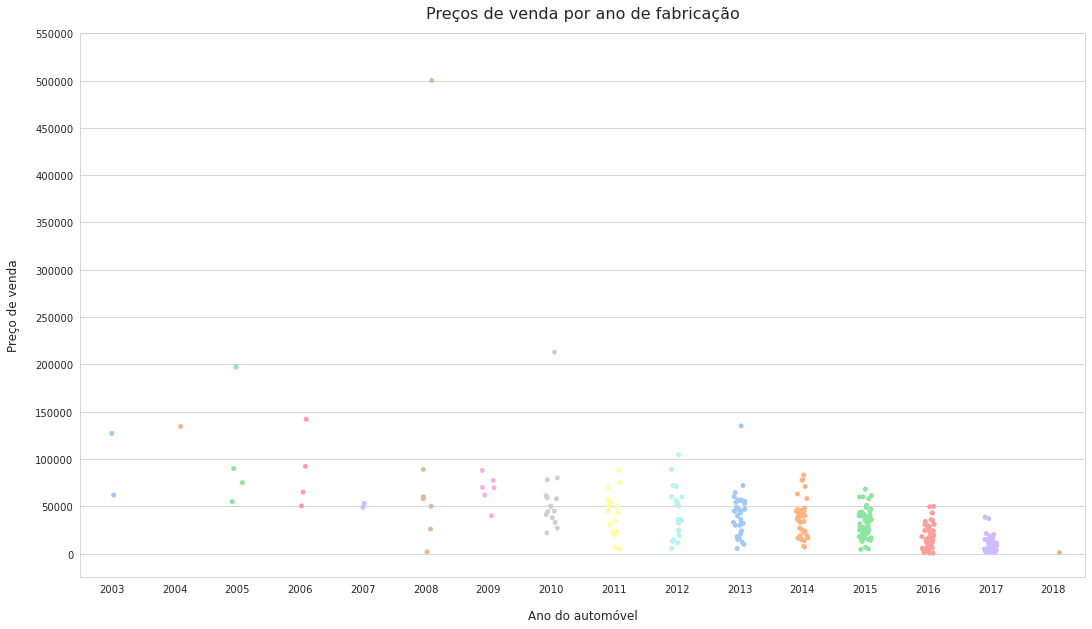

In [280]:
plt.figure(figsize=(18,10))
sns.stripplot(x=df['ano'],y=df['kms_rodados'],data=df,palette='pastel')
plt.title('Preços de venda por ano de fabricação',pad=15,fontdict={'fontsize':16})
plt.xlabel('Ano do automóvel',labelpad=15,fontdict={'fontsize':12})
plt.ylabel('Preço de venda',labelpad=15,fontdict={'fontsize':12})
plt.yticks(np.arange(0,600000,50000))
plt.show()

A maioria dos veículos mais novos (de 2013 a 2018), tem uma quilometragem menor do que 50000 km. Os mais antigos possuem uma quilometragem maior, como esperado. Além disso, observa-se um veículo discrepante, com mais de 500000 km rodados, que é de 2008. Podemos verificar se de fato ele é um outlier e qual o veículo:

* Sendo q3 o terceiro quartil e q1 o primeiro quartil, o dado será considerado um outlier se ultrapassar <b>(q3 + 1,5 * amplitude interquartil)</b>, sendo a amplitude interquartil = q3 - q1. Há abordagens que consideram  <b>2*(média + desvio padrão)</b> como limiar para um outlier.

In [281]:
# Estatísticas da coluna kms_rodados para os veículos do ano 2008
est = df[df['ano']==2008].describe()['kms_rodados']
est

count         7.000000
mean     112128.571429
std      173231.489769
min        1900.000000
25%       38000.000000
50%       58000.000000
75%       74500.000000
max      500000.000000
Name: kms_rodados, dtype: float64

In [282]:
# Novo dataframe apenas com veículos do ano 2008
df2 = df[df['ano']==2008]
df2

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
42,sx4,2008,1.95,7.150,58000,0,Revendedor,Manual,0
94,corolla altis,2008,4.00,22.780,89000,0,Revendedor,Automatico,0
184,Bajaj Pulsar 150,2008,0.25,0.750,26000,0,Individual,Manual,1
185,Suzuki Access 125,2008,0.25,0.580,1900,0,Individual,Automatico,0
190,Bajaj Pulsar 150,2008,0.20,0.750,60000,0,Individual,Manual,0
194,Hero CBZ Xtreme,2008,0.20,0.787,50000,0,Individual,Manual,0
196,Activa 3g,2008,0.17,0.520,500000,0,Individual,Automatico,0


In [284]:
# Verificando o outlier
df2[df2['kms_rodados']>(est['75%'] + 1.5*(est['75%']-est['25%']))]

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
196,Activa 3g,2008,0.17,0.52,500000,0,Individual,Automatico,0


#### Definindo a variável dependente e as variáveis independentes

In [285]:
# Definindo as variáveis independentes
x = df[['ano','preco_atual','kms_rodados','tipo_combustivel']]
x.head()

,ano,preco_atual,kms_rodados,tipo_combustivel
0,2014,5.59,27000,0
1,2013,9.54,43000,1
2,2017,9.85,6900,0
3,2011,4.15,5200,0
4,2014,6.87,42450,1


In [286]:
# Definindo a variável dependente
y = df[['preco_venda']]
y.head()

,preco_venda
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


#### Separando dados em treino e teste
Para construir nosso modelo de Machine Learning precisamos dividir os dados em duas partes. Uma para treinar o modelo e outra para testar o modelo com dados que ele não conhece. Para isso iremos separar 80% dos dados para treino e 20% dos dados para teste. Usaremos a biblioteca <b>train_test_split</b> que faz essa separação automaticamente.

In [287]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) # 20% é separado para teste

**x_train** é a parte usada para treinar o algoritmo

**x_test** é a parte usada para testar o algoritmo depois de treinado

**y_train** é a parte das respostas usadas no treino

**y_test** é a parte das respostas usadas para testar o algoritmo

#### Verificando as quantidades de treino e teste separados

In [288]:
print('Treino')
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)

print('\nTeste')
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

Treino
x_train:  (240, 4)
y_train:  (240, 1)

Teste
x_test:  (61, 4)
y_test:  (61, 1)


--- 
### <b> Passo 3: Escolha e treinamento do modelo de Machine Learning 🤖️ </b>

Esta etapa consiste em escolher o modelo (que será a regressão linear múltipla) e realizar o treinamento com o conjunto de treino.

In [289]:
from sklearn.linear_model import LinearRegression

# Define o modelo de regressão
model = LinearRegression()

# Realiza o treinamento do modelo com o dados de treino
model.fit(x_train,y_train)

LinearRegression()

---
### <b>Passo 4: Previsão e avaliação do modelo 🔮️ </b>

In [294]:
y_pred = model.predict(x_test)

In [307]:
print(y_pred.shape)
print(y_test.shape)

(61, 1)
(61, 1)


Comparação entre preços previstos e preços reais do conjunto de teste

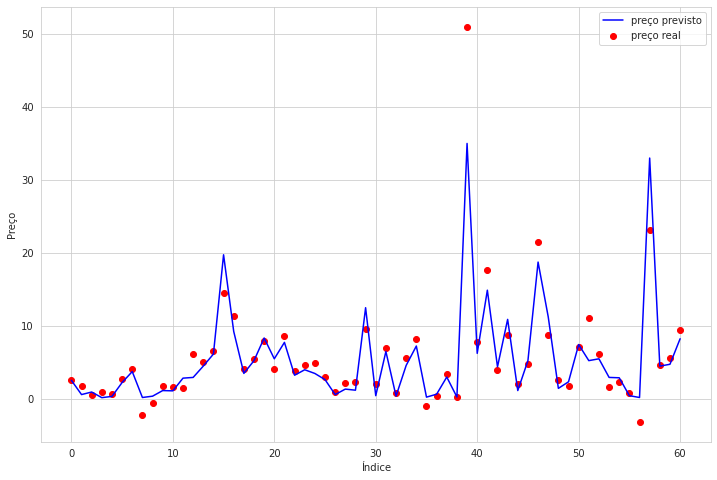

In [310]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(12,8))

# Plotando os preços previstos
plt.scatter(range(y_pred.shape[0]), y_pred,color='red')
# Plotando os preços reais
plt.plot(range(y_test.shape[0]), y_test,color='blue')

# Colocando legenda e labels no gráfico
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')
plt.show()

Observa-se que o modelo chega bem próximo dos preços reais do conjunto de teste. Vamos utilizar a medida R2 (coeficiente de determinação), para medir a acurácia.

In [317]:
from sklearn.metrics import r2_score

print('R2-score: ',r2_score(y_test,y_pred))

R2-score:  0.8175141339226307


O modelo prevê corretamente <b>81,75%</b> dos preços. O resultado é pior do que o encontrado usando os atributos <b>'ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel', 'tipo_vendedor', 'tipo_transmissao', 'n_donos'</b>, que alcançou acurácia de mais de 87%. Isso se dá pois alguma coluna não incluida nesse novo modelo, talvez possa impactar no preço do automóvel.


<b> Obrigado! </b>

---